<a href="https://colab.research.google.com/github/iyawewe/waterQualityAnalysis/blob/main/WaterQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color = sns.color_palette()
import scipy.stats             as stats
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy import stats

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


In [ ]:
path = "/content/drive/MyDrive/water_potability.csv"
df = pd.read_csv(path)

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
df['Potability']=df['Potability'].astype('category')
# Selecting Features and Target Variable
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']].values
y = df['Potability'].values

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')


,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [ ]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [ ]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


<Axes: title={'center': 'Missing Values Per Feature'}>

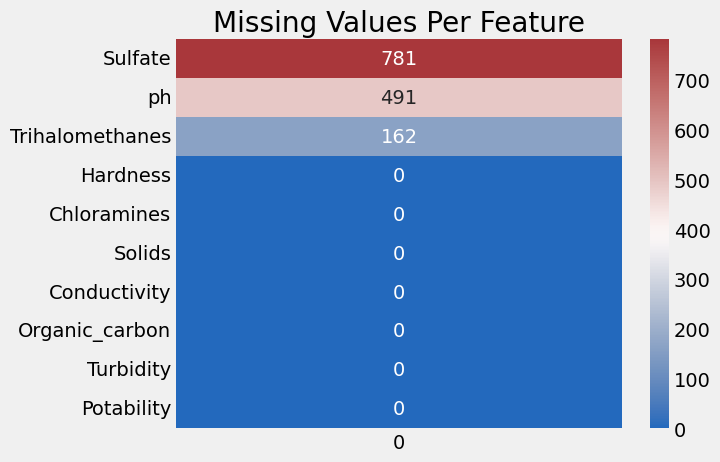

In [ ]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [ ]:
df[df['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [ ]:
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [ ]:
#################################### Imputing 'ph' value #####################################

phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [ ]:
print('Checking to see any more missing data \n')
df.isna().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

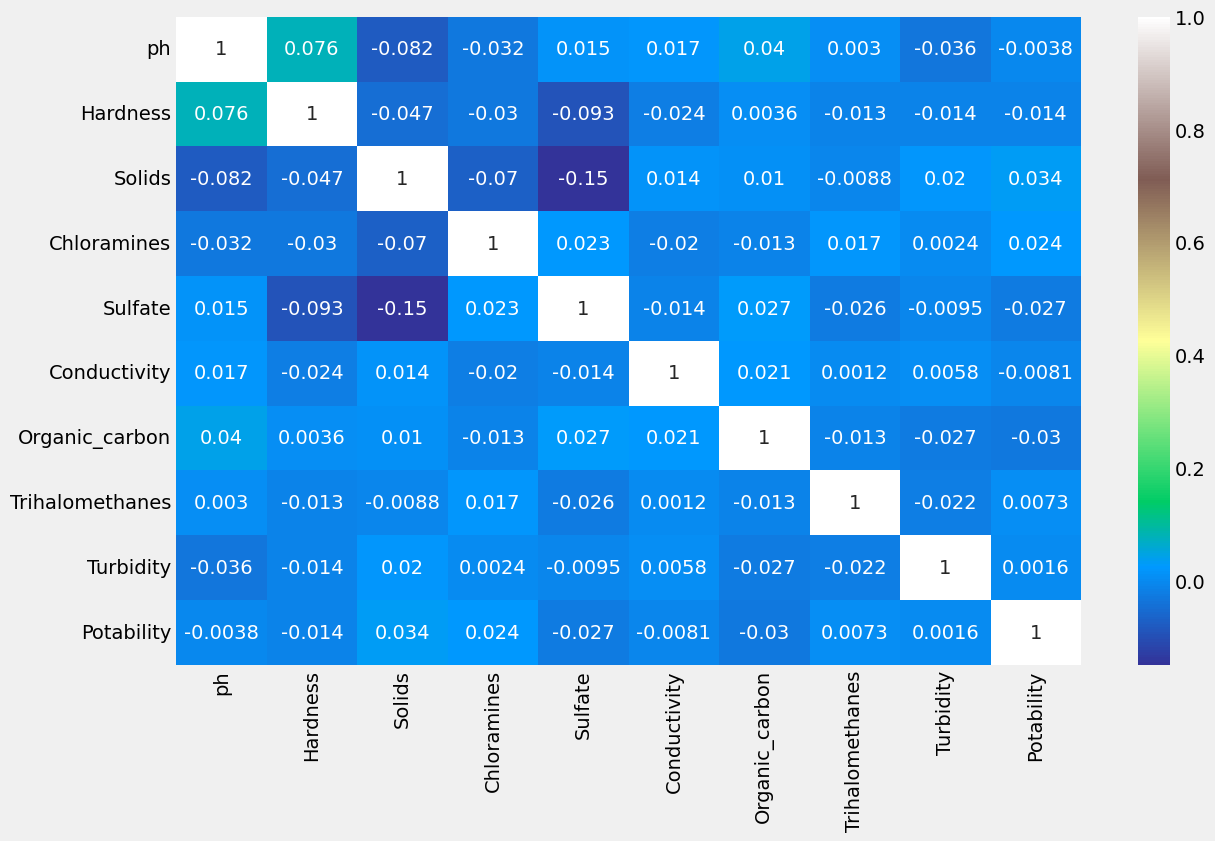

In [ ]:
 Corrmat = df.corr()
plt.subplots(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
import plotly.express as px
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Preparing the Data

X = df.drop('Potability', axis=1).copy()
y = df['Potability'].copy()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Scaling
ssc = StandardScaler()
X_train_scaled = pd.DataFrame(ssc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ssc.transform(X_test), columns=X_test.columns)

# Hyperparameter Tuning with RandomizedSearchCV
param_grid = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv=2,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Printing available results from cv_results_
results_df = pd.DataFrame(random_search.cv_results_)
print(results_df[['params', 'mean_fit_time', 'mean_score_time', 'mean_test_score', 'rank_test_score']].head(49))

# Best estimator
best_rfc = random_search.best_estimator_

# Predictions on test set
y_pred = best_rfc.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.4f}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)


Fitting 2 folds for each of 50 candidates, totalling 100 fits
                                               params  mean_fit_time  \
0   {'bootstrap': True, 'max_depth': None, 'min_sa...       0.974246   
1   {'bootstrap': True, 'max_depth': None, 'min_sa...       1.125131   
2   {'bootstrap': True, 'max_depth': 20, 'min_samp...       3.005186   
3   {'bootstrap': False, 'max_depth': 20, 'min_sam...       2.363654   
4   {'bootstrap': False, 'max_depth': 10, 'min_sam...       1.737574   
5   {'bootstrap': False, 'max_depth': None, 'min_s...       1.993643   
6   {'bootstrap': False, 'max_depth': None, 'min_s...       2.053816   
7   {'bootstrap': True, 'max_depth': 20, 'min_samp...       1.050761   
8   {'bootstrap': False, 'max_depth': 20, 'min_sam...       1.020771   
9   {'bootstrap': False, 'max_depth': 20, 'min_sam...       1.146135   
10  {'bootstrap': True, 'max_depth': 20, 'min_samp...       0.644298   
11  {'bootstrap': True, 'max_depth': None, 'min_sa...       0.708269   
12

In [ ]:

# Sample input
sample_input = [[7.292141805159221, 174.480426985448, 33991.6515668704, 9.51179239179086, 259.164965165777, 435.108017305264, 16.29361406829, 81.6901044506052, 4.466912564165]]

# Scaling the sample input
sample_input_scaled = ssc.transform(sample_input)  # Using the same StandardScaler instance `ssc`

# Predict using the best model
sample_prediction = best_rfc.predict(sample_input_scaled)

# Print the prediction
print(f'Predicted Potability: {sample_prediction[0]}')


Predicted Potability: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



              precision    recall  f1-score   support

           0       0.78      0.93      0.85       400
           1       0.84      0.59      0.69       256

    accuracy                           0.80       656
   macro avg       0.81      0.76      0.77       656
weighted avg       0.80      0.80      0.79       656

Best Accuracy: 0.7957317073170732


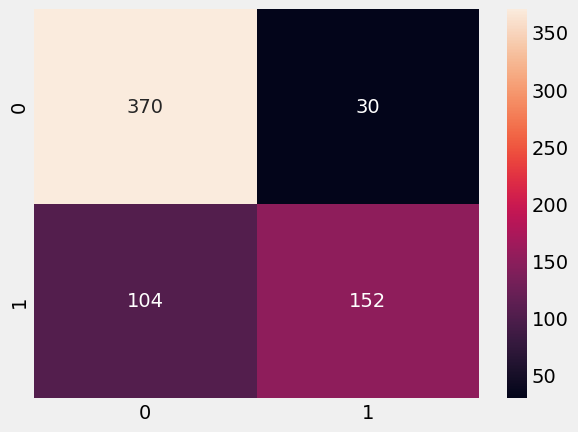

In [ ]:
best_rfc.fit(X_train, y_train)

y_best_rfc = best_rfc.predict(X_test)
print(classification_report(y_test, y_best_rfc))
best_accuracy = accuracy_score(y_test, y_best_rfc)
print("Best Accuracy:", best_accuracy)

sns.heatmap(confusion_matrix(y_test, y_best_rfc), annot=True, fmt='d')
plt.show()

XGB Classifier

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.77      0.61      0.68       256

    accuracy                           0.78       656
   macro avg       0.78      0.75      0.76       656
weighted avg       0.78      0.78      0.77       656



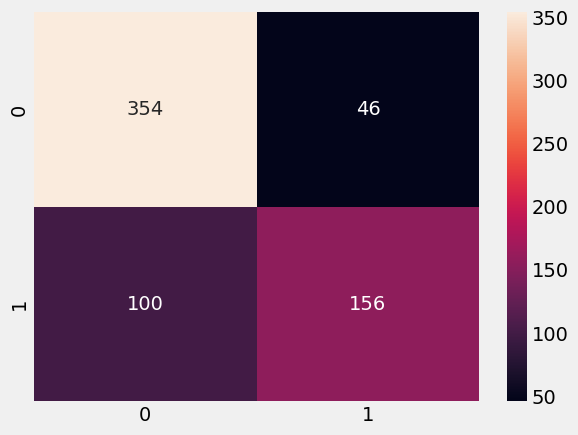

In [ ]:
#################################### XGB Classifier() #######################
print('XGB Classifier\n')
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_xgb))
accuracy = metrics.accuracy_score(y_test, y_xgb)
sns.heatmap(confusion_matrix(y_test, y_xgb), annot=True, fmt='d')
plt.show()